# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [8]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

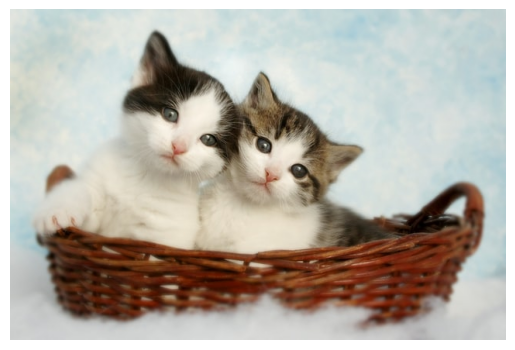

In [10]:
cat=cv2.imread('cats 2.jpg')
cat_rgb=cv2.cvtColor(cat,cv2.COLOR_BGR2RGB)
plt.imshow(cat_rgb)
plt.axis('off')
plt.show()

[[226.12  226.12  226.12  ... 211.404 212.404 213.404]
 [226.12  226.12  226.12  ... 211.404 212.404 213.404]
 [226.234 226.234 226.234 ... 210.404 212.404 212.404]
 ...
 [205.473 205.473 205.473 ... 207.473 207.473 207.473]
 [205.473 205.473 206.473 ... 207.473 207.473 207.473]
 [206.473 206.473 206.473 ... 207.473 207.473 207.473]]


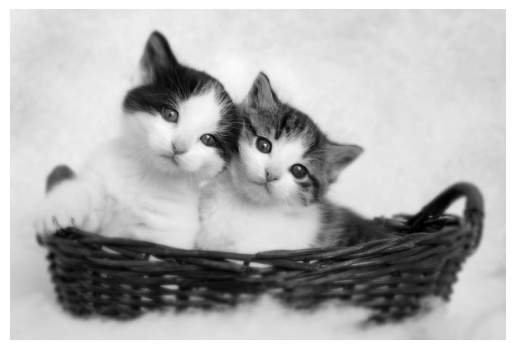

In [11]:
# rows,cols= cat.shape[:2]
# gray_weighted=np.zeros((rows,cols),dtype=np.uint8)

# for i in range(rows):
#     for j in range(cols):
#         b, g, r = cat[i, j]
#         gray_value = 0.114 * b + 0.587 * g + 0.299 * r
#         gray_weighted[i, j] = gray_value

# gray_weighted

gray_weighted=np.dot(cat[...,:3],[0.299,0.587,0.114])
print(gray_weighted)
plt.imshow(gray_weighted,cmap='gray')
plt.axis('off')
plt.show()

array([[226, 226, 226, ..., 209, 210, 211],
       [226, 226, 226, ..., 209, 210, 211],
       [226, 226, 226, ..., 208, 210, 210],
       ...,
       [205, 205, 205, ..., 207, 207, 207],
       [205, 205, 206, ..., 207, 207, 207],
       [206, 206, 206, ..., 207, 207, 207]], dtype=uint8)
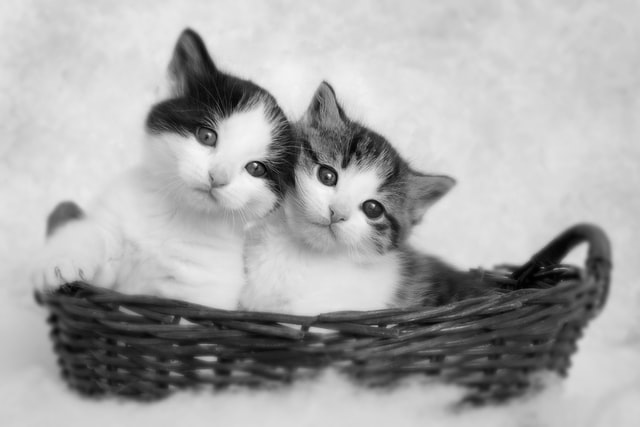

In [12]:
gray=cv2.cvtColor(cat,cv2.COLOR_BGR2GRAY)
gray

In [13]:
print("Shape of RGB image (cat_rgb):")
print(cat_rgb.shape)

print("\nShape of NumPy weighted grayscale image (gray_weighted):")
print(gray_weighted.shape)

print("\nShape of cvtColor grayscale image (gray):")
print(gray.shape)


Shape of RGB image (cat_rgb):
(427, 640, 3)

Shape of NumPy weighted grayscale image (gray_weighted):
(427, 640)

Shape of cvtColor grayscale image (gray):
(427, 640)


In [14]:
print("Pixel at (0,0):")
print("cat_rgb:\n",cat_rgb[0, 0])
print("gray_weighted:\n",gray_weighted[0, 0])
print("gray:\n",gray[0, 0])

print("\n3x3 block from top-left corner:")
print("cat_rgb:\n",cat_rgb[0:3, 0:3])
print("gray_weighted:\n",gray_weighted[0:3, 0:3])
print("gray:\n",gray[0:3, 0:3])
#3 channels [r,g,b] created in the initial image and a single channel created on the grayscale image

Pixel at (0,0):
cat_rgb:
 [222 228 224]
gray_weighted:
 226.11999999999998
gray:
 226

3x3 block from top-left corner:
cat_rgb:
 [[[222 228 224]
  [222 228 224]
  [222 228 224]]

 [[222 228 224]
  [222 228 224]
  [222 228 224]]

 [[223 228 224]
  [223 228 224]
  [223 228 224]]]
gray_weighted:
 [[226.12  226.12  226.12 ]
 [226.12  226.12  226.12 ]
 [226.234 226.234 226.234]]
gray:
 [[226 226 226]
 [226 226 226]
 [226 226 226]]


## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

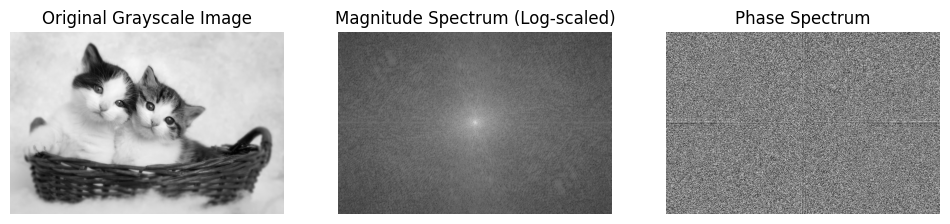

(427, 640)
(427, 640)
(427, 640)


In [15]:

f = np.fft.fft2(gray)
fshift = np.fft.fftshift(f)

magnitude_spectrum = 20 * np.log(np.abs(fshift)+1)
phase_spectrum = np.angle(fshift)

# Display Magnitude Spectrum
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum (Log-scaled)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(phase_spectrum, cmap='gray')
plt.axis('off')
plt.title('Phase Spectrum')

plt.show()
print(fshift.shape)
print(magnitude_spectrum.shape)
print(phase_spectrum.shape)


## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [16]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

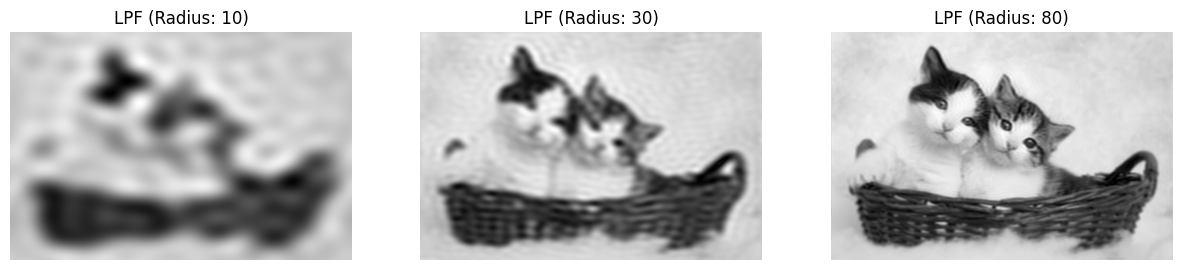

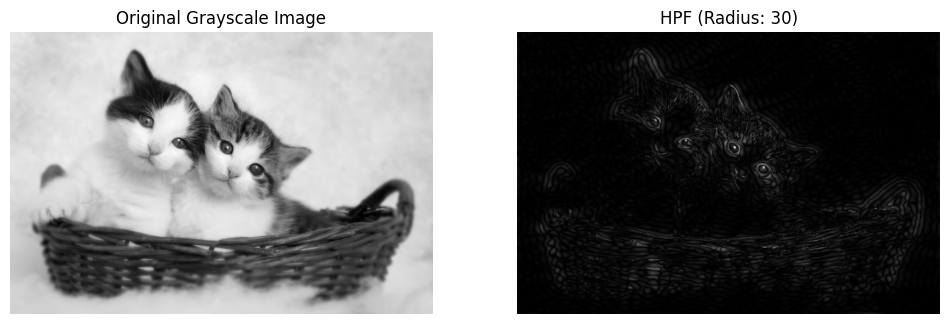

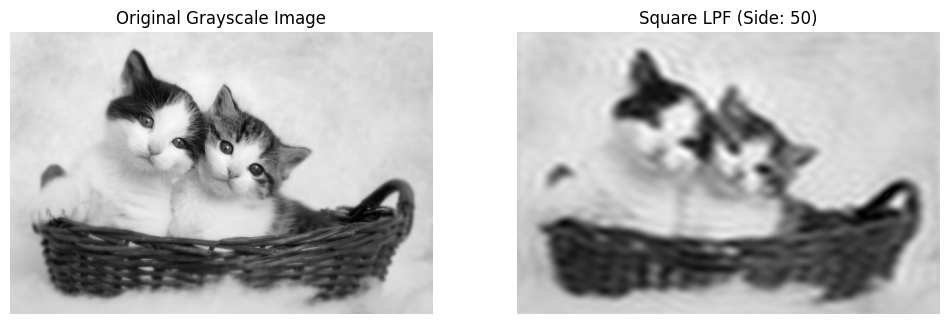

In [17]:
rows, cols = gray.shape
crow, ccol = rows // 2, cols // 2

def create_circular_mask(shape, center, radius, is_hpf=False):
    mask = np.zeros(shape, np.uint8)
    x, y = np.ogrid[:shape[0], :shape[1]]
    distance_from_center = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    if is_hpf:
        mask[distance_from_center > radius] = 1
    else:
        mask[distance_from_center <= radius] = 1
    return mask

def reconstruct_image(fshift_filtered):
    f_ishift = np.fft.ifftshift(fshift_filtered)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    # img_back = np.clip(img_back, 0, 255).astype(np.uint8)
    return img_back

#LPF mask
radii = [10, 30, 80]
plt.figure(figsize=(15, 5))

for i, r in enumerate(radii):
    mask_lpf = create_circular_mask(gray.shape, (crow, ccol), r)
    fshift_lpf_filtered = fshift * mask_lpf

    reconst_img = reconstruct_image(fshift_lpf_filtered)

    plt.subplot(1, 3 , i + 1)
    plt.imshow(reconst_img, cmap='gray')
    plt.title(f'LPF (Radius: {r})')
    plt.axis('off')
plt.show()

# Reason for increasing blur as radius decreases:
# A smaller radius for an LPF means that fewer high-frequency components are allowed to pass through the filter.
# High-frequency components are responsible for sharp edges and fine details in an image.
# By removing more of these high frequencies, the image becomes smoother and appears more blurred.
# Conversely, a larger radius allows more high frequencies, resulting in less blurring and more detail retention.

#HPF mask
radius_hpf = 30
mask_hpf = create_circular_mask(gray.shape, (crow, ccol), radius_hpf, is_hpf=True)
fshift_hpf_filtered = fshift * mask_hpf
img_hpf_reconstructed = reconstruct_image(fshift_hpf_filtered)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_hpf_reconstructed, cmap='gray')
plt.title(f'HPF (Radius: {radius_hpf})')
plt.axis('off')
plt.show()

#Square LPF mask
side_square = 50
mask_square_lpf = np.zeros(gray.shape, np.uint8)
half_side = side_square // 2
mask_square_lpf[crow - half_side : crow + half_side, ccol - half_side : ccol + half_side] = 1

fshift_square_lpf_filtered = fshift * mask_square_lpf
img_square_lpf_reconstructed = reconstruct_image(fshift_square_lpf_filtered)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_square_lpf_reconstructed, cmap='gray')
plt.title(f'Square LPF (Side: {side_square})')
plt.axis('off')
plt.show()

## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

In [18]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

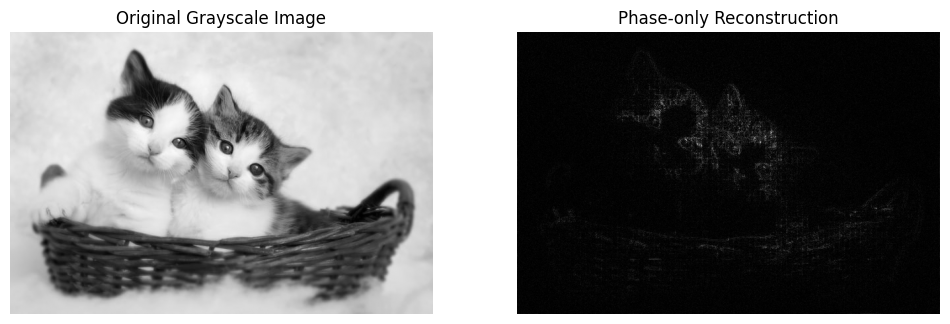

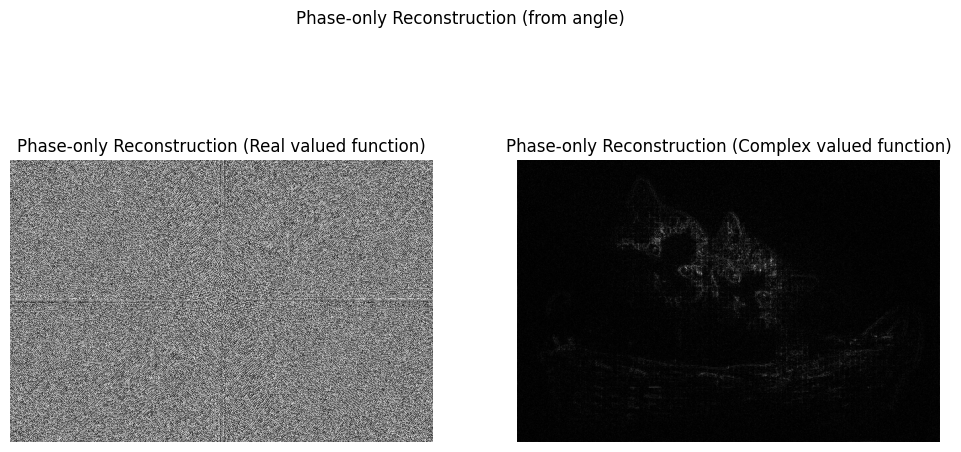

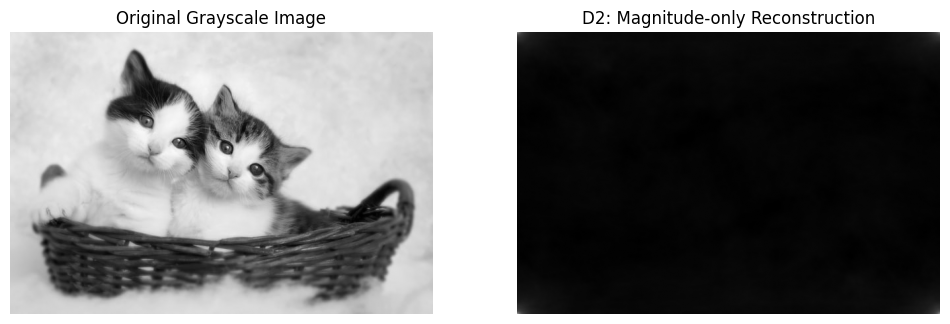

In [21]:
phase_only = fshift / np.abs(fshift)

# Reconstruct and display.
img_phase_only_reconstructed = reconstruct_image(phase_only)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_phase_only_reconstructed, cmap='gray')
plt.title('Phase-only Reconstruction')
plt.axis('off')
plt.show()

# Difference between fshift / np.abs(fshift) and np.angle(fshift):
# fshift / np.abs(fshift) gives us a complex array where the magnitude of each element is 1, and the phase is preserved.
# This essentially normalizes the magnitude to 1 while keeping the original phase information.
# When we reconstruct from this, we are performing an inverse FFT using only the phase information (and a uniform magnitude of 1).
# np.angle(fshift), on the other hand, returns only the phase angles (in radians) as a real-valued array.
# Directly reconstructing from np.angle(fshift) is not a standard operation in the same way, as the inverse FFT expects complex numbers.


#Reconstruction by doing two methode: using only np.angle(f_shift); and by creating a complex array with magnitude 1 and the phase from phase_spectrum.
# This is equivalent to `np.exp(1j * phase_spectrum)` or `np.cos(phase_spectrum) + 1j * np.sin(phase_spectrum)`.
#Furthermore there are no meaningful results using only np.angle(f_shift)
phase_only_from_angle = np.exp(1j * phase_spectrum)
img_phase_only_from_angle_reconstructed = reconstruct_image(phase_only_from_angle)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(phase_spectrum, cmap='gray')
plt.title('Phase-only Reconstruction (Real valued function)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_phase_only_from_angle_reconstructed, cmap='gray')
plt.title('Phase-only Reconstruction (Complex valued function)')
plt.axis('off')
plt.suptitle('Phase-only Reconstruction (from angle)')
plt.show()

# This demonstrates that the phase information primarily encodes the structural and positional information
# of features within an image. Even with a uniform magnitude, the spatial arrangement of pixels is preserved.

mag_only_fshift = np.abs(fshift)
img_magnitude_only_reconstructed = reconstruct_image(mag_only_fshift)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_magnitude_only_reconstructed, cmap='gray')
plt.title('Magnitude-only Reconstruction')
plt.axis('off')
plt.show()

# The raw magnitude spectrum (`np.abs(fshift)`) typically has a very large dynamic range.
# The low-frequency components (near the center) often have significantly higher magnitudes than the high-frequency components.
# If plotted directly, the high-frequency components would appear almost black and be indistinguishable.
# Applying a logarithm compresses this dynamic range, making the details in the higher-frequency regions
# more visible and allowing for better visualization of the entire spectrum.
.
# The Magnitude Spectrum shows where frequencies are strong or weak.
# The Magnitude-only Reconstruction (with zero phase) often results in a blurry blob or an image that lacks clear spatial structure,
# but might retain some information about the average intensity or texture, scattered symmetrically.
# This is because without the phase information to specify the location of these frequencies,
# they are effectively distributed symmetrically around the center, destroying the spatial relationships.

## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

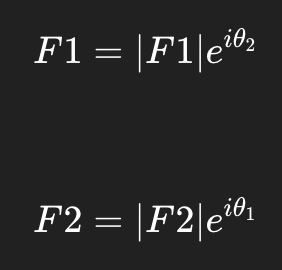

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [19]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

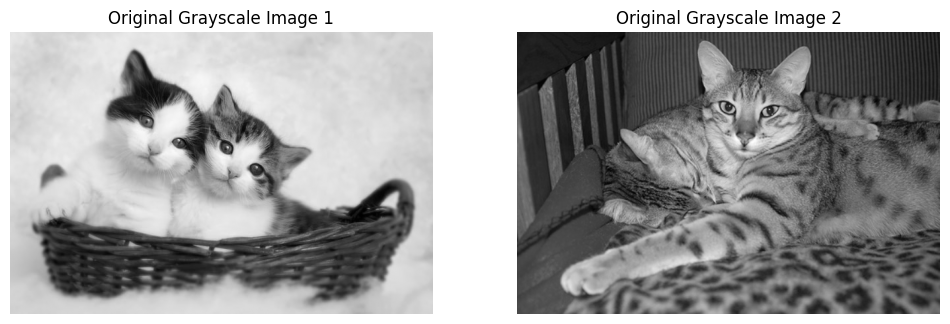

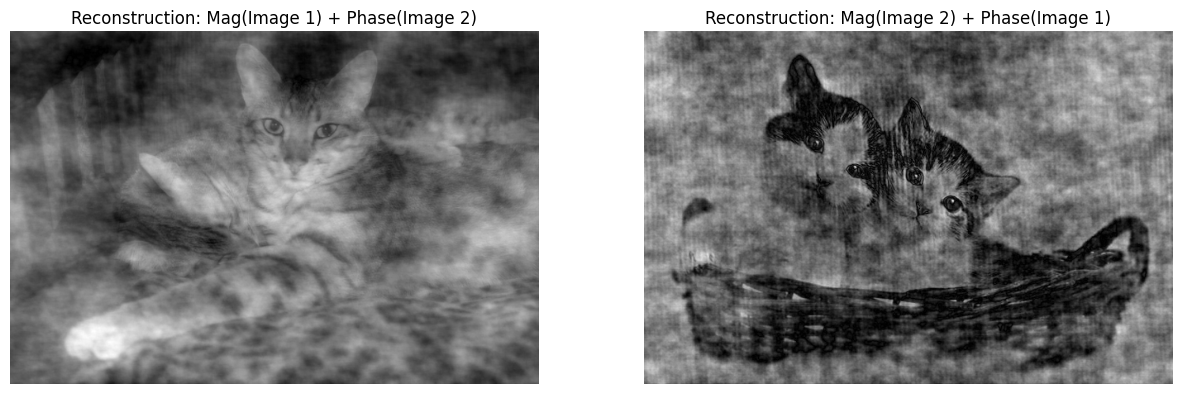

In [25]:
img2_path = '/content/n02124075_7825.JPEG'
img2 = cv2.imread(img2_path)

rows_img1, cols_img1 = gray.shape

# Resizing img2 to match the dimensions of gray
img2_resized = cv2.resize(img2, (cols_img1, rows_img1))

img2_rgb = cv2.cvtColor(img2_resized, cv2.COLOR_BGR2RGB)
gray2 = cv2.cvtColor(img2_resized, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Grayscale Image 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray2, cmap='gray')
plt.title('Original Grayscale Image 2')
plt.axis('off')
plt.show()

# Image 1 (CATESH No. 1)
f_img1 = np.fft.fft2(gray)
fshift_img1 = np.fft.fftshift(f_img1)
mag_img1 = np.abs(fshift_img1)
phase_img1 = np.angle(fshift_img1)

# Image 2 (CATESH No. 2)
f_img2 = np.fft.fft2(gray2)
fshift_img2 = np.fft.fftshift(f_img2)
mag_img2 = np.abs(fshift_img2)
phase_img2 = np.angle(fshift_img2)

combined_fshift_mag1_phase2 = mag_img1 * np.exp(1j * phase_img2)
img_reconstructed_mag1_phase2 = reconstruct_image(combined_fshift_mag1_phase2)

combined_fshift_mag2_phase1 = mag_img2 * np.exp(1j * phase_img1)
img_reconstructed_mag2_phase1 = reconstruct_image(combined_fshift_mag2_phase1)

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.imshow(img_reconstructed_mag1_phase2, cmap='gray')
plt.title('Reconstruction: Mag(Image 1) + Phase(Image 2)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_reconstructed_mag2_phase1, cmap='gray')
plt.title('Reconstruction: Mag(Image 2) + Phase(Image 1)')
plt.axis('off')
plt.show()

# When magnitude from Image 1 is combined with phase from Image 2, the reconstructed image
# will primarily resemble Image 2 in terms of its structural content (edges, shapes, object arrangement),
# but will have the overall brightness, contrast, and 'texture' characteristics of Image 1.
# Conversely, when magnitude from Image 2 is combined with phase of Image 1, the reconstructed image
# will show the structure of Image 1, but with the texture and intensity profile of Image 2.
# Phase describes the structure, position, and spatial arrangement of elements within an image.
# Magnitude describes the intensity, contrast, and 'texture' (fine details, smoothness, roughness) of an image.
# Phase alone can reconstruct useful image structures, "Phase>Magnitude"